In [2]:
import ee

In [7]:
import ee
import folium

# Initialize Earth Engine
ee.Initialize()

# Morphological processing of land cover. This example
# includes spatial smoothing (neighborhood mode) followed by
# dilation, erosion and dilation again. Reprojection is
# used to force these operations to be performed at the
# native scale of the input (rather than variable pixel
# sizes based on zoom level).

# Force projection of 500 meters/pixel, which is the native MODIS resolution.
SCALE = 500

# Load a 2001 MODIS land cover image.
image1 = ee.Image('MODIS/051/MCD12Q1/2001_01_01')

# Select the classification band of interest.
image2 = image1.select(['Land_Cover_Type_1'])

# Reproject to WGS84 to force the image to be reprojected on load.
# This is just for display purposes, to visualize the input to
# the following operations. The next reproject is sufficient
# to force the computation to occur at native scale.
image3 = image2.reproject('EPSG:4326', None, SCALE)

# Smooth with a mode filter.
image4 = image3.focal_mode()

# Use erosion and dilation to get rid of small islands.
image5 = image4.focal_max(3).focal_min(5).focal_max(3)

# Reproject to force the operations to be performed at SCALE.
image6 = image5.reproject('EPSG:4326', None, SCALE)

# Define display parameters with appropriate colors for the MODIS
# land cover classification image.
PALETTE = [
    'aec3d4',  # water
    '152106', '225129', '369b47', '30eb5b', '387242',  # forest
    '6a2325', 'c3aa69', 'b76031', 'd9903d', '91af40',  # shrub, grass, savannah
    '111149',  # wetlands
    'cdb33b',  # croplands
    'cc0013',  # urban
    '33280d',  # crop mosaic
    'd7cdcc',  # snow and ice
    'f7e084',  # barren
    '6f6f6f'  # tundra
]

# Create a folium map centered on the region of interest
center = [40.055489, -113.41842]
map = folium.Map(location=center, zoom_start=6)

# Define a helper function to add Earth Engine tile layers to the folium map
def add_ee_layer(image, vis_params, name):
    map_id = image.getMapId(vis_params)
    tile_url = map_id['tile_fetcher'].url_format
    layer = folium.TileLayer(
        tiles=tile_url,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    )
    map.add_child(layer)

# Add the Earth Engine imagery to the map
folium_params = {'min': 0, 'max': 17, 'palette': ','.join}

In [8]:
from IPython.display import display

# Create a folium map centered on the region of interest
center = [40.055489, -113.41842]
map = folium.Map(location=center, zoom_start=6)

# Add the Earth Engine imagery to the map
folium_params = {'min': 0, 'max': 17, 'palette': ','.join(PALETTE)}
add_ee_layer(image2, folium_params, 'IGBP classification')
add_ee_layer(image3, folium_params, 'Reprojected')
add_ee_layer(image4, folium_params, 'Mode')
add_ee_layer(image5, folium_params, 'Smooth')
add_ee_layer(image6, folium_params, 'Smooth')

# Display the map
display(map)

In [19]:
pip install earthengine-api folium;


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
#pip install selenium

In [16]:
!pwd

/Users/dataspare/code/lewagon/B2B-CACIB/algebra


In [26]:
import ee
import folium
import numpy as np
import selenium.webdriver as webdriver
from PIL import Image

# Initialize Earth Engine
ee.Initialize()

# Morphological processing of land cover. This example
# includes spatial smoothing (neighborhood mode) followed by
# dilation, erosion, and dilation again. Reprojection is
# used to force these operations to be performed at the
# native scale of the input (rather than variable pixel
# sizes based on zoom level).

# Force projection of 500 meters/pixel, which is the native MODIS resolution.
SCALE = 500

# Load a 2001 MODIS land cover image.
image1 = ee.Image('MODIS/051/MCD12Q1/2001_01_01')

# Select the classification band of interest.
image2 = image1.select(['Land_Cover_Type_1'])

# Reproject to WGS84 to force the image to be reprojected on load.
# This is just for display purposes, to visualize the input to
# the following operations. The next reproject is sufficient
# to force the computation to occur at native scale.
image3 = image2.reproject('EPSG:4326', None, SCALE)

# Smooth with a mode filter.
image4 = image3.focal_mode()

# Use erosion and dilation to get rid of small islands.
image5 = image4.focal_max(3).focal_min(5).focal_max(3)

# Reproject to force the operations to be performed at SCALE.
image6 = image5.reproject('EPSG:4326', None, SCALE)

# Define display parameters with appropriate colors for the MODIS
# land cover classification image.
PALETTE = [
    'aec3d4',  # water
    '152106', '225129', '369b47', '30eb5b', '387242',  # forest
    '6a2325', 'c3aa69', 'b76031', 'd9903d', '91af40',  # shrub, grass, savannah
    '111149',  # wetlands
    'cdb33b',  # croplands
    'cc0013',  # urban
    '33280d',  # crop mosaic
    'd7cdcc',  # snow and ice
    'f7e084',  # barren
    '6f6f6f'  # tundra
]

# Create a folium map centered on the region of interest
center = [40.055489, -113.41842]
map = folium.Map(location=center, zoom_start=6)

# Define a helper function to add Earth Engine tile layers to the folium map
def add_ee_layer(image, vis_params, name):
    map_id = image.getMapId(vis_params)
    tile_url = map_id['tile_fetcher'].url_format
    folium.TileLayer(
        tiles=tile_url,
        attr='Google Earth Engine',
        name=name,
        overlay=True,
        control=True
    ).add_to(map)

# Add Earth Engine layers to the map
folium_params = {'min': 0, 'max': 17, 'palette': ','.join(PALETTE)}
add_ee_layer(image2, folium_params, 'IGBP classification')
add_ee_layer(image3, folium_params, 'Reprojected')
add_ee_layer(image4, folium_params, 'Mode')
add_ee_layer(image5, folium_params, 'Smooth')
add_ee_layer(image6, folium_params, 'Smooth')

map.save('map.html')

# Use Selenium to open the HTML file and take a screenshot
driver = webdriver.Chrome()  # You may need to specify the path to the chromedriver executable
driver.get('file://{}/map.html'.format(os.getcwd()))
driver.save_screenshot('screenshot.png')
driver.quit()

# Open the screenshot and convert it to a NumPy array
image = Image.open('screenshot.png')
numpy_array = np.array(image)

# Display the NumPy array
print(numpy_array)

[[[178 195 211 255]
  [178 195 211 255]
  [178 195 211 255]
  ...
  [149 173  86 255]
  [150 171  85 255]
  [152 170  83 255]]

 [[178 195 211 255]
  [178 195 211 255]
  [178 195 211 255]
  ...
  [148 173  88 255]
  [150 171  87 255]
  [155 171  85 255]]

 [[178 195 211 255]
  [178 195 211 255]
  [178 195 211 255]
  ...
  [147 172  92 255]
  [151 172  91 255]
  [160 174  90 255]]

 ...

 [[178 195 211 255]
  [178 195 211 255]
  [178 195 211 255]
  ...
  [224 231 203 255]
  [224 231 203 255]
  [224 231 203 255]]

 [[178 195 211 255]
  [178 195 211 255]
  [178 195 211 255]
  ...
  [224 231 203 255]
  [224 231 203 255]
  [224 231 203 255]]

 [[178 195 211 255]
  [178 195 211 255]
  [178 195 211 255]
  ...
  [224 231 203 255]
  [224 231 203 255]
  [224 231 203 255]]]


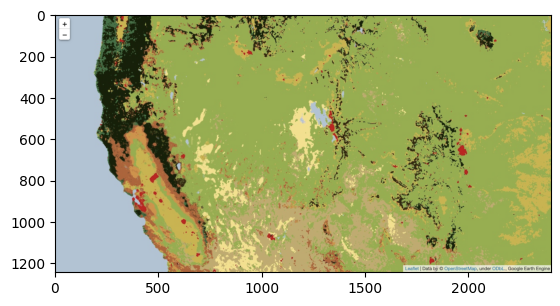

In [27]:
plt.imshow(numpy_array)

In [28]:
!pwd

/Users/dataspare/code/lewagon/B2B-CACIB/algebra
